In [1]:
###
# Creating the dataset
###
#78 goods
#5000 clients

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
###
#Generating list of products - 17*5 random products
###
products = ['Whole-Grain-Bread, Sourdough-Bread, Gluten-Free-Bread, Garlic-Bread, Banana-Bread, Cheese-Pie, Spinach-Pie, Apple-Pie, Coconut-Pie, Sweet-Potato-Pie, Blue-Cheese, Gryere-Cheesem Cheddar, Parmesan, Fontina-Cheese, Halloumi, Bacon, Ham, Smoked-Turkey, Boiled-Turkey, Mayonnaise, Mustard, Dijon-Mustard, Ketchup, Tahini, Yogurt, Strawberry-Yogurt, Banana-Yogurt, Blueberry-Yogurt, Lemon-Yogurt, Salomon, Sea-Bass, Sea-Bream, Local-Sea-Bass, Chicken, Chicken-Breast, Pork-Steak, Beef-Steak, Bananas, Strawberries, Apples, Berries, Potatoes, Hazelnuts, Baked-Hazelnuts, Cashews, Salted-Cashews, Pecans, Filtered-Coffee, Caramel-Coffee, Hazelnut-Coffee, Greek-Coffee, Espresso, Full-Fat-Milk, Semi-Skimmed-Milk, Delact-Milk, Almond-Milk, Oat-Milk, Dates, Figs, Brazil-Nuts, Macadamian, Chia, Rice, Spaghetti, GF-Spaghetti, Rigatoni, Macaroni, Almonds, Walnuts, Chickpeas, Black_Eyed-peas, Beans, Protein-Bars, Black-Pepper-Chips, Salt-Chips, Caramel-Chocolate, Black-Chocolate, Beer, Red-Wine, White-Wine, Vodka, Raki']
product_list = list(products[0].split(", "))

###
#Generating a dataframe with 5000 random baskets:
###



In [4]:
#########################################################################
####################################################################################
#########################################################################
####################################################################################
#########################################################################
####################################################################################

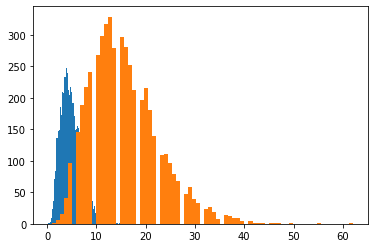

In [5]:
def gamma(k,theta,center):
    '''
    Generates random numbers between 1-82, peaking peak around 'center' value.
    The numbers are the result of a gamma distribution, with k and theta.
    '''
    no_of_customers = 5000
    shape, scale = k, theta # k,theta - peak of distribution
    test = np.random.standard_gamma(shape, no_of_customers)
    y, x, _ = plt.hist(test, bins=82)
    peak = x[np.argmax(y)]
    market_items = 82 
    norm_value = center/peak #moving center of distribution to 12 -> assumed average number of basket items
    
    #normalizing value
    test = test.__mul__(norm_value)
    
    #rounding each value of distribtion to an integer 
    rounded = []
    for no in test:
            rounded.append(round(no, 0))
    y1, x1, _ = plt.hist(rounded, bins=15*5)        
    return rounded

###
#generating the random numbers:
###
center = 12 #Assuming most customers buy 12 items 
no_of_items_bought = gamma(5,1,center) #Generating number of items each customer bought

In [6]:
###
#Choosing the items each consumer bought -
#Generating an aray with numbers. each number represents an item bought. 
#To be used as an index at a later stage
###
items_bought = []
for i in no_of_items_bought:
    rng = np.random.default_rng() #randomizes the generator every turn
    rints = rng.integers(low=0,high=82,size = i.astype(int)) #problem with duplicate values in an array. 
    items_bought.append (rints)
#    ones_positions.append (rints)

In [7]:
items_bought

[array([20, 17,  4, 11, 20, 66, 30, 32, 54, 14,  2, 42, 15], dtype=int64),
 array([57, 50, 72, 25, 27, 38, 44, 24, 72, 19, 67, 44, 66, 19,  6, 78, 17,
        29], dtype=int64),
 array([44, 21, 31, 31, 52, 65, 20,  9, 69, 65,  2, 56, 27, 20, 48],
       dtype=int64),
 array([49, 65, 58, 30,  7,  0, 55, 61, 38, 56, 13, 68, 65], dtype=int64),
 array([77, 13, 27, 11, 52, 57, 72, 40, 29, 38, 22], dtype=int64),
 array([47, 23, 44, 76, 47, 42, 58, 64,  7, 15, 21, 29, 18, 17,  3,  7, 41,
        25], dtype=int64),
 array([75, 67, 37, 57, 25,  9, 42, 42, 46,  6, 28, 11, 42, 27,  5],
       dtype=int64),
 array([11, 13, 75, 58, 65, 59, 11,  2, 37, 27], dtype=int64),
 array([44, 63, 18, 17, 52, 45, 76, 53, 61, 40, 60, 67, 21, 67, 33, 72, 43,
        70, 51, 77, 21, 68, 62], dtype=int64),
 array([17, 58, 31, 10, 70, 69, 12, 44, 56, 64], dtype=int64),
 array([68, 30,  6, 47, 32, 19, 37, 19,  4,  0, 46, 29, 76, 66],
       dtype=int64),
 array([68,  8, 44, 28, 30, 27, 12, 71, 60, 49, 29, 13,  7], d

In [8]:
#For each customer:
def make_list (list_length,ones_positions):
    '''
    Makes a list of length 'list_lenth', with 0s and 1s.
    The 1s positions are at the indexes denoted by the 'ones_positions' array 
    Takes as argument: 
         list_lenth -> the length of the list, integer
        ones_positions -> array of indexes, where 1's are in the list 
    '''
    products_bought = [0]*list_length #make a list
    for i in ones_positions:
        products_bought[i]=1
    return products_bought

In [9]:
###
#Create an empty df with the market items:
###
customers_basket = pd.DataFrame(columns=product_list)

### v
#Fill the df with the random generated "buys":
###
for i in range (0,5000):
    customer_list = make_list(82,items_bought[i].tolist()) ## List should be that of the length of the market items
    customers_basket.loc[len(customers_basket.index)] = customer_list

In [10]:
customers_basket

,Whole-Grain-Bread,Sourdough-Bread,Gluten-Free-Bread,Garlic-Bread,Banana-Bread,Cheese-Pie,Spinach-Pie,Apple-Pie,Coconut-Pie,Sweet-Potato-Pie,...,Protein-Bars,Black-Pepper-Chips,Salt-Chips,Caramel-Chocolate,Black-Chocolate,Beer,Red-Wine,White-Wine,Vodka,Raki
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4997,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
